<a href="https://colab.research.google.com/github/utkarshkumarawasthi98/Machine-learning/blob/main/ASSIGNMENT_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Results without cross-validation (K=3):
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


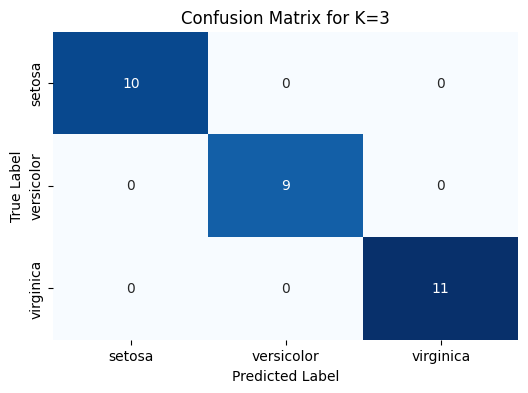


Results with 10-fold cross-validation (K=3):
Precision: 0.9738
Recall: 0.9663
F1-Score: 0.9649
Accuracy: 0.9667


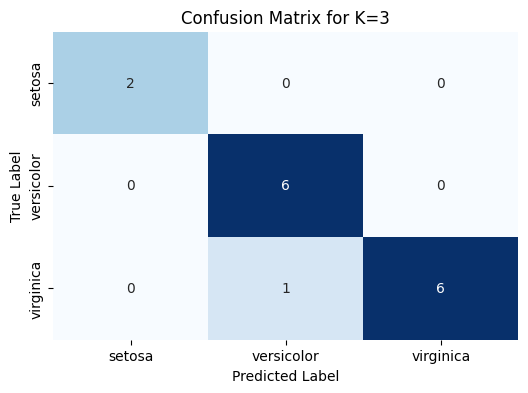

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# KNN Classifier from scratch
def knn_classifier(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        # Compute distances from test_point to all training points
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        # Get the indices of the k nearest neighbors
        k_neighbors_idx = np.argsort(distances)[:k]
        # Get the classes of the k nearest neighbors
        k_neighbor_labels = y_train[k_neighbors_idx]
        # Majority vote (most common class)
        majority_class = np.bincount(k_neighbor_labels).argmax()
        predictions.append(majority_class)
    return np.array(predictions)

# Function to evaluate the classifier
def evaluate_classifier(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    return precision, recall, f1, accuracy, conf_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for K=3')
    plt.show()

# Perform KNN for k=3 without cross-validation
k = 3
y_pred = knn_classifier(X_train, y_train, X_test, k)

# Evaluate the classifier
precision, recall, f1, accuracy, conf_matrix = evaluate_classifier(y_test, y_pred)

# Print results for k=3 without cross-validation
print("Results without cross-validation (K=3):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix)

# Function for k-fold cross-validation
def cross_validate_knn(X, y, k, num_folds=10):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    precision_scores, recall_scores, f1_scores, accuracy_scores = [], [], [], []

    for train_index, test_index in kf.split(X):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        # Predict using custom KNN classifier for the current fold
        y_pred_fold = knn_classifier(X_train_fold, y_train_fold, X_test_fold, k)

        # Evaluate the classifier for the current fold
        precision, recall, f1, accuracy, _ = evaluate_classifier(y_test_fold, y_pred_fold)

        # Store the scores
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        accuracy_scores.append(accuracy)

    # Compute average scores across all folds
    return {
        "precision": np.mean(precision_scores),
        "recall": np.mean(recall_scores),
        "f1": np.mean(f1_scores),
        "accuracy": np.mean(accuracy_scores)
    }

# Perform KNN for k=3 with 10-fold cross-validation
results_with_cv = cross_validate_knn(X, y, k, num_folds=10)


# Function for k-fold cross-validation (with confusion matrix plot)
def cross_validate_knn_with_cm(X, y, k, num_folds=10):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    precision_scores, recall_scores, f1_scores, accuracy_scores = [], [], [], []
    confusion_matrices = []

    for train_index, test_index in kf.split(X):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        # Predict using custom KNN classifier for the current fold
        y_pred_fold = knn_classifier(X_train_fold, y_train_fold, X_test_fold, k)

        # Evaluate the classifier for the current fold
        precision, recall, f1, accuracy, conf_matrix = evaluate_classifier(y_test_fold, y_pred_fold)

        # Store the scores and confusion matrix for each fold
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        accuracy_scores.append(accuracy)
        confusion_matrices.append(conf_matrix)

    # Compute average scores across all folds
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)
    avg_accuracy = np.mean(accuracy_scores)

    return {
        "precision": avg_precision,
        "recall": avg_recall,
        "f1": avg_f1,
        "accuracy": avg_accuracy,
        "last_confusion_matrix": confusion_matrices[-1]  # Return the confusion matrix of the last fold
    }

# Perform KNN for k=3 with 10-fold cross-validation and confusion matrix plotting
results_with_cv = cross_validate_knn_with_cm(X, y, k, num_folds=10)

# Print results for k=3 with 10-fold cross-validation
print("\nResults with 10-fold cross-validation (K=3):")
print(f"Precision: {results_with_cv['precision']:.4f}")
print(f"Recall: {results_with_cv['recall']:.4f}")
print(f"F1-Score: {results_with_cv['f1']:.4f}")
print(f"Accuracy: {results_with_cv['accuracy']:.4f}")

# Plot the confusion matrix for the last fold of cross-validation
plot_confusion_matrix(results_with_cv['last_confusion_matrix'])

Results without cross-validation (K=5):
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


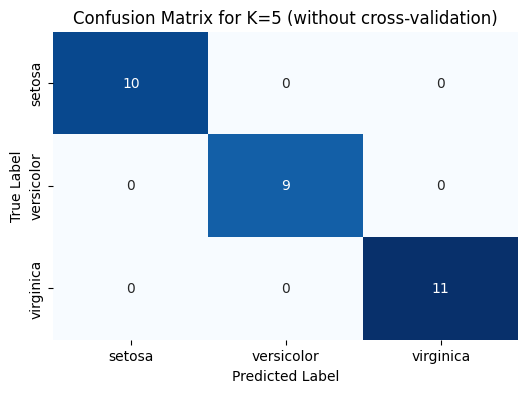


Results with 10-fold cross-validation (K=5):
Precision: 0.9786
Recall: 0.9730
F1-Score: 0.9712
Accuracy: 0.9733


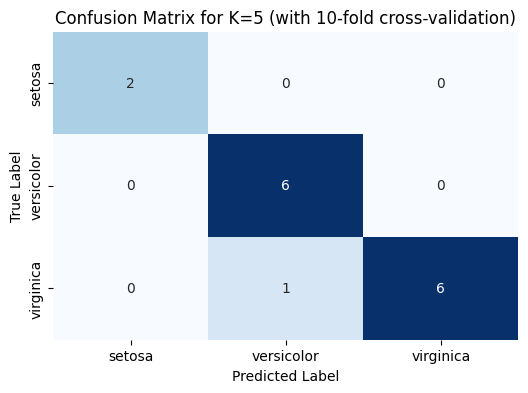

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# KNN Classifier from scratch
def knn_classifier(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        # Compute distances from test_point to all training points
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        # Get the indices of the k nearest neighbors
        k_neighbors_idx = np.argsort(distances)[:k]
        # Get the classes of the k nearest neighbors
        k_neighbor_labels = y_train[k_neighbors_idx]
        # Majority vote (most common class)
        majority_class = np.bincount(k_neighbor_labels).argmax()
        predictions.append(majority_class)
    return np.array(predictions)

# Function to evaluate the classifier
def evaluate_classifier(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    return precision, recall, f1, accuracy, conf_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, title="Confusion Matrix"):
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Perform KNN for k=5 without cross-validation
k = 5
y_pred = knn_classifier(X_train, y_train, X_test, k)

# Evaluate the classifier
precision, recall, f1, accuracy, conf_matrix = evaluate_classifier(y_test, y_pred)

# Print results for k=5 without cross-validation
print("Results without cross-validation (K=5):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, title="Confusion Matrix for K=5 (without cross-validation)")

# Function for k-fold cross-validation (with confusion matrix plot)
def cross_validate_knn_with_cm(X, y, k, num_folds=10):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    precision_scores, recall_scores, f1_scores, accuracy_scores = [], [], [], []
    confusion_matrices = []

    for train_index, test_index in kf.split(X):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        # Predict using custom KNN classifier for the current fold
        y_pred_fold = knn_classifier(X_train_fold, y_train_fold, X_test_fold, k)

        # Evaluate the classifier for the current fold
        precision, recall, f1, accuracy, conf_matrix = evaluate_classifier(y_test_fold, y_pred_fold)

        # Store the scores and confusion matrix for each fold
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        accuracy_scores.append(accuracy)
        confusion_matrices.append(conf_matrix)

    # Compute average scores across all folds
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)
    avg_accuracy = np.mean(accuracy_scores)

    return {
        "precision": avg_precision,
        "recall": avg_recall,
        "f1": avg_f1,
        "accuracy": avg_accuracy,
        "last_confusion_matrix": confusion_matrices[-1]  # Return the confusion matrix of the last fold
    }

# Perform KNN for k=5 with 10-fold cross-validation and confusion matrix plotting
results_with_cv = cross_validate_knn_with_cm(X, y, k, num_folds=10)

# Print results for k=5 with 10-fold cross-validation
print("\nResults with 10-fold cross-validation (K=5):")
print(f"Precision: {results_with_cv['precision']:.4f}")
print(f"Recall: {results_with_cv['recall']:.4f}")
print(f"F1-Score: {results_with_cv['f1']:.4f}")
print(f"Accuracy: {results_with_cv['accuracy']:.4f}")

# Plot the confusion matrix for the last fold of cross-validation
plot_confusion_matrix(results_with_cv['last_confusion_matrix'], title="Confusion Matrix for K=5 (with 10-fold cross-validation)")


In [ ]:
from tabulate import tabulate
import pandas as pd

# Define results for k=3 and k=5 (without and with cross-validation)
results = {
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Without CV (k=3)': [1.0000, 1.0000, 1.0000, 1.0000],
    'With CV (k=3)': [0.9738, 0.9663, 0.9649, 0.9667],
    'Without CV (k=5)': [1.0000, 1.0000, 1.0000, 1.0000],
    'With CV (k=5)': [0.9786, 0.9730, 0.9712, 0.9733]
}

# Create a DataFrame to hold the results
df = pd.DataFrame(results)

# Use tabulate to format the table
table = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the table
print("\nKNN Classifier Results for k=3 and k=5:")
print(table)



KNN Classifier Results for k=3 and k=5:
╒═══════════╤════════════════════╤═════════════════╤════════════════════╤═════════════════╕
│ Metric    │   Without CV (k=3) │   With CV (k=3) │   Without CV (k=5) │   With CV (k=5) │
╞═══════════╪════════════════════╪═════════════════╪════════════════════╪═════════════════╡
│ Precision │                  1 │          0.9738 │                  1 │          0.9786 │
├───────────┼────────────────────┼─────────────────┼────────────────────┼─────────────────┤
│ Recall    │                  1 │          0.9663 │                  1 │          0.973  │
├───────────┼────────────────────┼─────────────────┼────────────────────┼─────────────────┤
│ F1-Score  │                  1 │          0.9649 │                  1 │          0.9712 │
├───────────┼────────────────────┼─────────────────┼────────────────────┼─────────────────┤
│ Accuracy  │                  1 │          0.9667 │                  1 │          0.9733 │
╘═══════════╧════════════════════╧═════

Results without cross-validation (K=5):
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


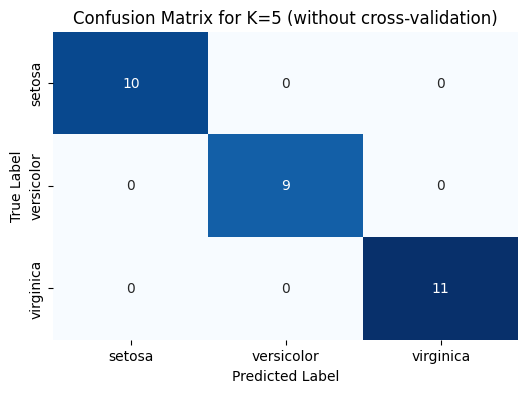


Results with 10-fold cross-validation (K=5):
Precision: 0.9786
Recall: 0.9730
F1-Score: 0.9712
Accuracy: 0.9733


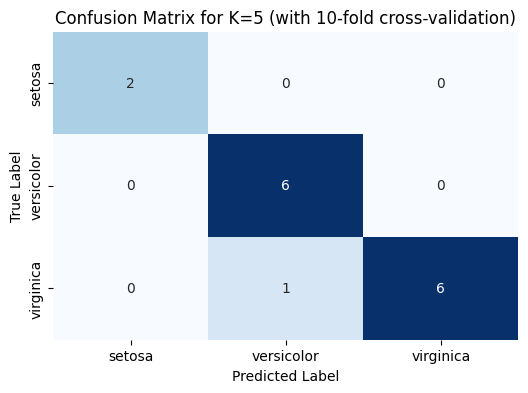

In [2]:
# USING BUILT IN FUNCTIONS

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Classifier using Scikit-learn
def knn_classifier(X_train, y_train, X_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn.predict(X_test)

# Function to evaluate the classifier
def evaluate_classifier(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    return precision, recall, f1, accuracy, conf_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, title="Confusion Matrix"):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Perform KNN for k=5 without cross-validation
k = 5
y_pred = knn_classifier(X_train, y_train, X_test, k)

# Evaluate the classifier
precision, recall, f1, accuracy, conf_matrix = evaluate_classifier(y_test, y_pred)

# Print results for k=5 without cross-validation
print("Results without cross-validation (K=5):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, title="Confusion Matrix for K=5 (without cross-validation)")

# Function for k-fold cross-validation (with confusion matrix plot)
def cross_validate_knn_with_cm(X, y, k, num_folds=10):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    precision_scores, recall_scores, f1_scores, accuracy_scores = [], [], [], []
    confusion_matrices = []

    for train_index, test_index in kf.split(X):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        # Predict using Scikit-learn KNN classifier for the current fold
        y_pred_fold = knn_classifier(X_train_fold, y_train_fold, X_test_fold, k)

        # Evaluate the classifier for the current fold
        precision, recall, f1, accuracy, conf_matrix = evaluate_classifier(y_test_fold, y_pred_fold)

        # Store the scores and confusion matrix for each fold
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        accuracy_scores.append(accuracy)
        confusion_matrices.append(conf_matrix)

    # Compute average scores across all folds
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)
    avg_accuracy = np.mean(accuracy_scores)

    return {
        "precision": avg_precision,
        "recall": avg_recall,
        "f1": avg_f1,
        "accuracy": avg_accuracy,
        "last_confusion_matrix": confusion_matrices[-1]  # Return the confusion matrix of the last fold
    }

# Perform KNN for k=5 with 10-fold cross-validation and confusion matrix plotting
results_with_cv = cross_validate_knn_with_cm(X, y, k, num_folds=10)

# Print results for k=5 with 10-fold cross-validation
print("\nResults with 10-fold cross-validation (K=5):")
print(f"Precision: {results_with_cv['precision']:.4f}")
print(f"Recall: {results_with_cv['recall']:.4f}")
print(f"F1-Score: {results_with_cv['f1']:.4f}")
print(f"Accuracy: {results_with_cv['accuracy']:.4f}")

# Plot the confusion matrix for the last fold of cross-validation
plot_confusion_matrix(results_with_cv['last_confusion_matrix'], title="Confusion Matrix for K=5 (with 10-fold cross-validation)")


Results without cross-validation (K=3):
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


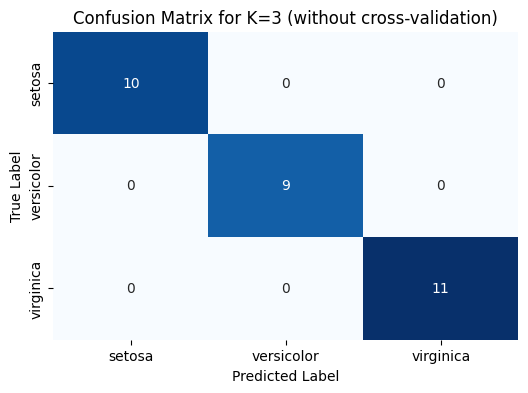


Results with 10-fold cross-validation (K=3):
Precision: 0.9738
Recall: 0.9663
F1-Score: 0.9649
Accuracy: 0.9667


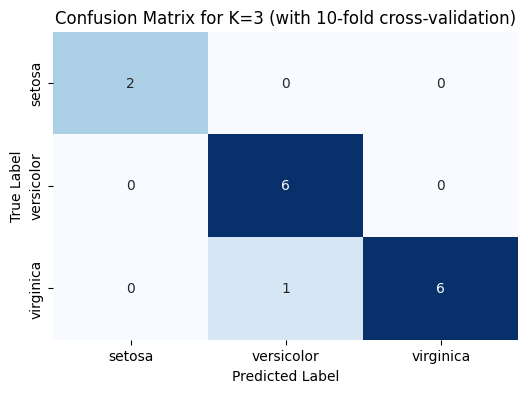

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Classifier using Scikit-learn
def knn_classifier(X_train, y_train, X_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn.predict(X_test)

# Function to evaluate the classifier
def evaluate_classifier(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    return precision, recall, f1, accuracy, conf_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, title="Confusion Matrix"):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Perform KNN for k=3 without cross-validation
k = 3
y_pred = knn_classifier(X_train, y_train, X_test, k)

# Evaluate the classifier
precision, recall, f1, accuracy, conf_matrix = evaluate_classifier(y_test, y_pred)

# Print results for k=3 without cross-validation
print("Results without cross-validation (K=3):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, title="Confusion Matrix for K=3 (without cross-validation)")

# Function for k-fold cross-validation (with confusion matrix plot)
def cross_validate_knn_with_cm(X, y, k, num_folds=10):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    precision_scores, recall_scores, f1_scores, accuracy_scores = [], [], [], []
    confusion_matrices = []

    for train_index, test_index in kf.split(X):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        # Predict using Scikit-learn KNN classifier for the current fold
        y_pred_fold = knn_classifier(X_train_fold, y_train_fold, X_test_fold, k)

        # Evaluate the classifier for the current fold
        precision, recall, f1, accuracy, conf_matrix = evaluate_classifier(y_test_fold, y_pred_fold)

        # Store the scores and confusion matrix for each fold
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        accuracy_scores.append(accuracy)
        confusion_matrices.append(conf_matrix)

    # Compute average scores across all folds
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)
    avg_accuracy = np.mean(accuracy_scores)

    return {
        "precision": avg_precision,
        "recall": avg_recall,
        "f1": avg_f1,
        "accuracy": avg_accuracy,
        "last_confusion_matrix": confusion_matrices[-1]  # Return the confusion matrix of the last fold
    }

# Perform KNN for k=3 with 10-fold cross-validation and confusion matrix plotting
results_with_cv = cross_validate_knn_with_cm(X, y, k, num_folds=10)

# Print results for k=3 with 10-fold cross-validation
print("\nResults with 10-fold cross-validation (K=3):")
print(f"Precision: {results_with_cv['precision']:.4f}")
print(f"Recall: {results_with_cv['recall']:.4f}")
print(f"F1-Score: {results_with_cv['f1']:.4f}")
print(f"Accuracy: {results_with_cv['accuracy']:.4f}")

# Plot the confusion matrix for the last fold of cross-validation
plot_confusion_matrix(results_with_cv['last_confusion_matrix'], title="Confusion Matrix for K=3 (with 10-fold cross-validation)")


In [5]:
from tabulate import tabulate
import pandas as pd

# Define results for k=3 and k=5 (without and with cross-validation)
results = {
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Without CV (k=3)': [1.0000, 1.0000, 1.0000, 1.0000],
    'With CV (k=3)': [0.9738, 0.9663, 0.9649, 0.9667],
    'Without CV (k=5)': [1.0000, 1.0000, 1.0000, 1.0000],
    'With CV (k=5)': [0.9786, 0.9730, 0.9712, 0.9733]
}

# Create a DataFrame to hold the results
df = pd.DataFrame(results)

# Use tabulate to format the table
table = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the table
print("\nKNN Classifier Results for k=3 and k=5: USING BUILT IN FUNCTIONS")
print(table)





KNN Classifier Results for k=3 and k=5: USING BUILT IN FUNCTIONS
╒═══════════╤════════════════════╤═════════════════╤════════════════════╤═════════════════╕
│ Metric    │   Without CV (k=3) │   With CV (k=3) │   Without CV (k=5) │   With CV (k=5) │
╞═══════════╪════════════════════╪═════════════════╪════════════════════╪═════════════════╡
│ Precision │                  1 │          0.9738 │                  1 │          0.9786 │
├───────────┼────────────────────┼─────────────────┼────────────────────┼─────────────────┤
│ Recall    │                  1 │          0.9663 │                  1 │          0.973  │
├───────────┼────────────────────┼─────────────────┼────────────────────┼─────────────────┤
│ F1-Score  │                  1 │          0.9649 │                  1 │          0.9712 │
├───────────┼────────────────────┼─────────────────┼────────────────────┼─────────────────┤
│ Accuracy  │                  1 │          0.9667 │                  1 │          0.9733 │
╘═══════════╧═